# Ajuste de Oultiers
El presente notebook presenta un algoritmo para suavizar outliers en series temporales de variables atmósfericas. Se trabaja con los valores obtenidos por una red inalámbrica de sensores desplegada en un cultivo de cacao en una vereda del municipio de San Cayetano, Norte de Santander. Las mediciones analizadas corresponden a las variables atmósfericas Temperatura, Humedad Relativa, Humedad de la Tierra e Intensidad Lumínica.

In [1]:
# Se importan los módulos necesarios
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import funs
from scipy.stats.stats import pearsonr

# Se define un límite para las filas de los dataframes que se presenten en el notebook
pd.options.display.max_rows = 10

In [2]:
# Importa los datos correspondientes al nodo 2
nodo = 2
mediciones_cacao = pd.read_csv('mediciones_cacao_n%s.csv' %nodo)
#mediciones_cacao.loc[:, 'TIME'] = [pd.Timestamp(x) for x in mediciones_cacao['TIME']]
mediciones_cacao.drop('NIVEL UV',axis=1,inplace=True)
mediciones_cacao = mediciones_cacao.copy()
# Crea dos copias de los datos, filtrado para realzar un filtro de valores atípicos
# según el rango de medición y ajustado para suavizar la curva 
filtrado = mediciones_cacao.copy()
ajustado = mediciones_cacao.copy()

In [3]:
mediciones_cacao

,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,INTENSIDAD LUMÍNICA,HORA,TIME
0,27,19,74.97,5853,9,2018-05-09 09:38:00
1,28,19,72.72,5865,9,2018-05-09 09:49:00
2,28,19,72.56,5859,9,2018-05-09 09:50:00
3,28,19,72.40,5859,9,2018-05-09 09:51:00
4,28,19,72.08,5859,9,2018-05-09 09:52:00
...,...,...,...,...,...,...
11037,31,17,0.82,5853,6,2018-06-11 06:13:00
11038,31,17,0.82,5853,6,2018-06-11 06:14:00
11039,31,17,0.82,5853,6,2018-06-11 06:15:00
11040,31,17,0.82,5853,6,2018-06-11 06:16:00


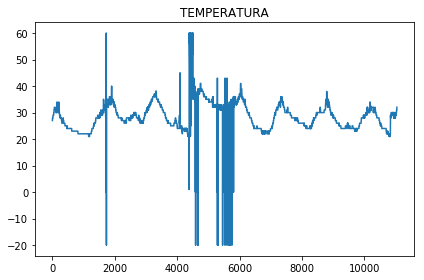

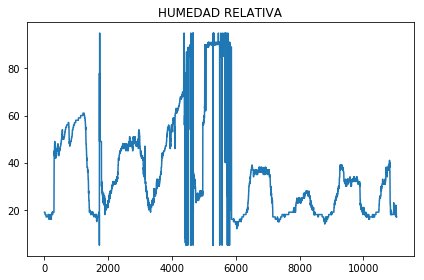

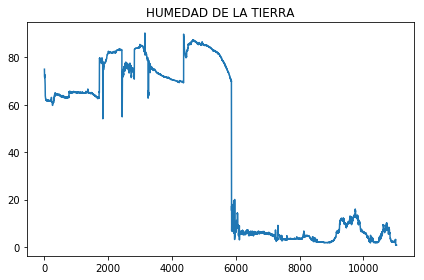

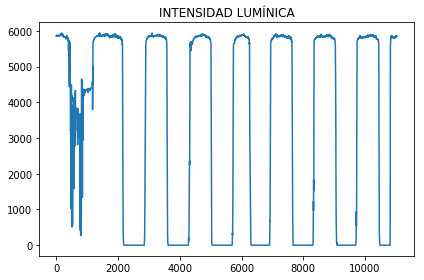

In [4]:
# Grafica las variables  de interes
a=510
for i in range(0,4):
    a+=1
    #plt.subplot(a)
    plt.figure()
    plt.plot(mediciones_cacao.iloc[:,i])
    plt.title(mediciones_cacao.columns[i])
    plt.tight_layout()


A partir de los gráficos de los valores medidos es posible deducir relaciones existentes entre las variables:
- Relación de proporcionaliad inversa entre la temperatura y la humedad relativa.
- Correlación positiva entre la humedad relativa y la humedad del suelo.
- Correspodencia de los valores máximos de intensidad lumínica con los ciclos positivos de temperatura.

Correlaciones positivas
- Temperatura - Intensidad Lumínica.
- Humedad Relativa - Humedad de la Tierra.

Correlaciones negativas
- Temperatura - Humedad Relativa
- Temperatura - Humedad de la Tierra.
- Humedad Relativa - Intensidad Lumínica.

A continuación se realiza un grafico de matriz de correlación para visualizar mejor la relación entre las varibles.

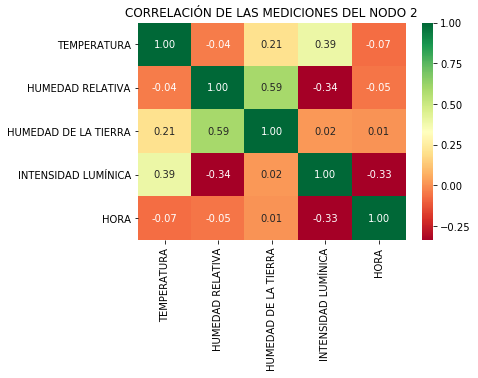

In [5]:
sns.heatmap(mediciones_cacao.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('CORRELACIÓN DE LAS MEDICIONES DEL NODO %s' %nodo)
plt.show()

C:\Users\Jergb\Dropbox\Proyecto\Python\AA\funs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtrado[variable][i] = filtrado[variable][i-120:i].median()


15
42


,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,INTENSIDAD LUMÍNICA,HORA
TEMPERATURA,1.000000,-0.094734,0.224847,0.445187,-0.038244
HUMEDAD RELATIVA,-0.094734,1.000000,0.594785,-0.336219,-0.051088
HUMEDAD DE LA TIERRA,0.224847,0.594785,1.000000,0.023028,0.009354
INTENSIDAD LUMÍNICA,0.445187,-0.336219,0.023028,1.000000,-0.331241
HORA,-0.038244,-0.051088,0.009354,-0.331241,1.000000


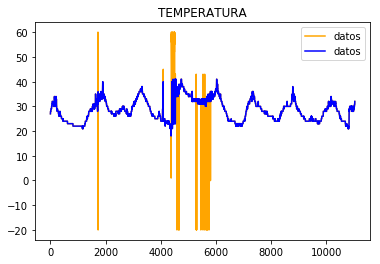

In [6]:
funs.mediciones_cacao= mediciones_cacao
filtrado = mediciones_cacao.copy()
funs.filtrado=filtrado
lim_menor0 = funs.filtro_menor(0,1,16,55,0)
print(lim_menor0)
lim_mayor0 = funs.filtro_mayor(0,1,16,55,0)
print(lim_mayor0)

corr0 = funs.filtro_var(0,lim_menor0,lim_mayor0)
funs.info_var(0)
plt.plot(filtrado.iloc[:,0],'blue',label='datos')
plt.legend()
corr0

C:\Users\Jergb\Dropbox\Proyecto\Python\AA\funs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtrado[variable][i] = filtrado[variable][i-120:i].median()


4
91


,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,INTENSIDAD LUMÍNICA,HORA
TEMPERATURA,1.000000,-0.091489,0.224847,0.445187,-0.038244
HUMEDAD RELATIVA,-0.091489,1.000000,0.607845,-0.330784,-0.058192
HUMEDAD DE LA TIERRA,0.224847,0.607845,1.000000,0.023028,0.009354
INTENSIDAD LUMÍNICA,0.445187,-0.330784,0.023028,1.000000,-0.331241
HORA,-0.038244,-0.058192,0.009354,-0.331241,1.000000


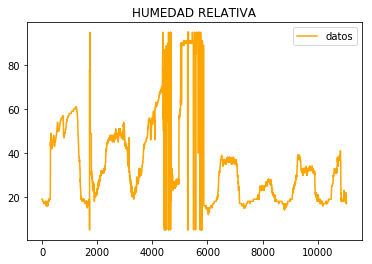

In [7]:
lim_menor1 = funs.filtro_menor(1,0,10,100,0)
print(lim_menor1)

lim_mayor1 = funs.filtro_mayor(1,0,10,100,0)
print(lim_mayor1)

corr1 = funs.filtro_var(1,lim_menor1,lim_mayor1)
funs.info_var(1)
corr1

4
91


,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,INTENSIDAD LUMÍNICA,HORA
TEMPERATURA,1.000000,-0.091489,0.224847,0.445187,-0.038244
HUMEDAD RELATIVA,-0.091489,1.000000,0.607845,-0.330784,-0.058192
HUMEDAD DE LA TIERRA,0.224847,0.607845,1.000000,0.023028,0.009354
INTENSIDAD LUMÍNICA,0.445187,-0.330784,0.023028,1.000000,-0.331241
HORA,-0.038244,-0.058192,0.009354,-0.331241,1.000000


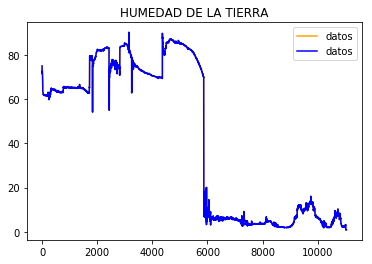

In [8]:
lim_menor2 = funs.filtro_menor(2,1,0,100,1)
print(lim_menor1)
funs.filtro_var(0,lim_menor0,lim_mayor0)
lim_mayor2 = funs.filtro_mayor(2,1,0,100,1)
print(lim_mayor1)

corr1 = funs.filtro_var(2,lim_menor2,lim_mayor2)
funs.info_var(2)
plt.plot(filtrado.iloc[:,2],'blue',label='datos')
plt.legend()
corr1

Temperatura 0
HR 1
HS 2
IL 3
H 4
correlación--->(X,X)

lim_menor3 = funs.filtro_menor(3,0,0,100,1)
print(lim_menor1)
funs.filtro_var(0,lim_menor0,lim_mayor0)
lim_mayor3 = funs.filtro_mayor(3,0,0,100,1)
print(lim_mayor1)

funs.filtro_var(3,lim_menor3,lim_mayor3)

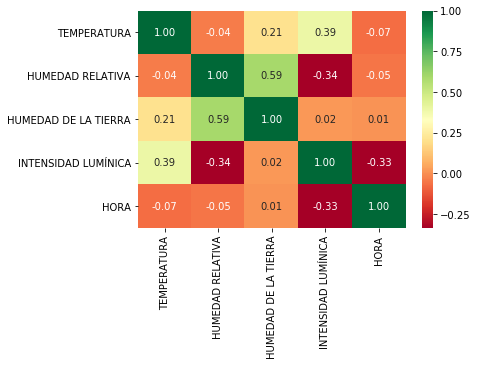

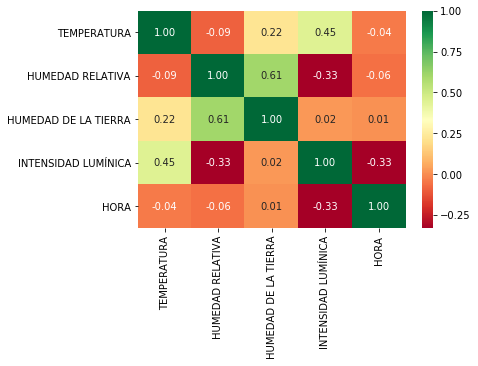

In [9]:
sns.heatmap(mediciones_cacao.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.figure()
sns.heatmap(filtrado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")

In [10]:
a={'corre':[3,5,2,2,1]}
a=pd.DataFrame(a)
a.index[a['corre'] == a.corre.min()].tolist()[0]
#pd.DataFrame(d)
#d[0]

4

Debe variar los límites y escoger el rango que asegure la mejor correación, luego pasa a trabajar con otra variable 
y repite el paso anterior, así hasta completar todas las variables, luego vuelve a comenzar, se realiza hasa que todas 
las variables presentan el valor de correlación más óptimo.
def filter():
# calcular la correlación entre la variable de ineres y las demás
# variar el límte superior hasta llegar al valor dspuesto por tukey para el límite superior, seleccioar el valor superior
#que ofrece la mejor correlación con las demás variables. VAriar el límite inferior......
# pasar a la sigiente variable.....
# Repetir hasta opbtner los mejores valores

# Se hace de manera ana´loga para suavizar la serie

El sensor DHT11 tiene rangos de medición de:  
- Temperatura de $(20°C - 50°C)\pm5°C$  
- Humedad Ralativa de $(20\% - 90\%)\pm2\%$

L arelación entre la temperatura y la humedad relativa es de una correlación negativa


NameError: name 'info_var' is not defined

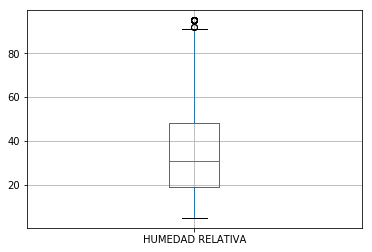

<Figure size 432x288 with 0 Axes>

In [11]:
(mediciones_cacao.iloc[:,1:2]).boxplot()
plt.figure()

info_var(1)
filtro_var(1,0,54)
ajuste_variacion(1)

plt.figure()

(ajustado.iloc[:,1:2]).boxplot()
filtrado.corr().iloc[:,0:1]

In [ ]:
plt.scatter(mediciones_cacao.iloc[:,1],mediciones_cacao.iloc[:,2])
plt.figure()
plt.hist(mediciones_cacao.iloc[:,1])
plt.hist(mediciones_cacao.iloc[:,2])
plt.show()

In [ ]:
info_var(1)
filtro_var(1,0,54)
ajuste_variacion(1)
plt.figure()
plt.plot(mediciones_cacao.iloc[:,1].rolling(60).std())

In [ ]:
info_var(2)
filtro_var(2,10,100)
ajuste_variacion(2)
plt.figure()
plt.plot(mediciones_cacao.iloc[:,2].rolling(60).std())

In [ ]:
-1<3


In [ ]:
info_var(3)
filtro_var(3,0,100)
ajuste_variacion(3)
plt.figure()
plt.plot(mediciones_cacao.iloc[:,3].rolling(60).std())

In [ ]:
info_var(4)
filtro_var(4,-10,6000)
ajuste_variacion(4)
plt.figure()
plt.plot(mediciones_cacao.iloc[:,4].rolling(60).std())

In [ ]:
mediciones_cacao['NODO'].replace(to_replace=[nodo], value='Nodo%s'%nodo, inplace=True) 
sns.pairplot(mediciones_cacao,hue='NODO',plot_kws=dict(s=10),diag_kind='kde')
plt.show()

In [ ]:
ajustado['NODO'].replace(to_replace=[nodo], value='Nodo%s' %nodo, inplace=True) 
sns.pairplot(ajustado,hue='NODO',plot_kws=dict(s=10),diag_kind=('kde'))
plt.show()

In [ ]:
filtrado['NODO'].replace(to_replace=[nodo], value='Nodo%s' %nodo, inplace=True) 

sns.heatmap(mediciones_cacao.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('CORRELACIÓN DE LAS MEDICIONES DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(filtrado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES FILTRADAS DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(ajustado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES AJUSTADAS DEL NODO %s' %nodo)
plt.show()